In [21]:
%matplotlib inline
import os
import sys
from matplotlib import *
from pylab import *
import math

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.formatter.limits'] = [-5,5]

In [22]:
def get_underscore_locations(file):
    underscore_locations = [index for index, character in enumerate(file)
                            if character == "_"]
    return underscore_locations

def get_file_contents(file_name):
    file_path = os.path.join(path, file_name)
    with open(file_path, "r") as file:
        file.readline()
        file_contents = file.readlines()
    return file_contents

def get_detuning_and_gamma(file_contents, dataset):
    file_lines_decomposed = [[float(number) for number in line.strip().split('\t')]
                             for line in file_contents]
    output_outliers(file_lines_decomposed, dataset)
    file_lines_decomposed = [i for i in file_lines_decomposed if abs(i[1]) < 200]
    detuning, gamma = zip(*file_lines_decomposed)
    return detuning, gamma

def output_outliers(file_lines_decomposed, dataset):
    for i in file_lines_decomposed:
        if abs(i[1]) >= 200:
            print((f"Detuning: {i[0]}\n"
                   f"Gamma: {i[1]}\n"
                   f"Dataset: {dataset}\n"))

In [23]:
def plot_detuning_vs_gamma(path):
    for file_name in sorted(os.listdir(path)):
        file_contents = get_file_contents(file_name)
        data_set = file_name[18:]
        detuning, gamma = get_detuning_and_gamma(file_contents, data_set)
        plt.plot(detuning, gamma, label = data_set)
    return plt

def add_plot_labels(plt):
    plt = plot_labels_x_axis(plt)
    plt.legend(loc="upper right")
    plt.ylabel("Gamma")
    plt.title("Sideband Gamma vs Frequency")
    return plt

def plot_labels_x_axis(plt):
    plt = set_x_ticks(plt)
    prefix, prefix_power = get_prefix_data(plt)
    x_ticks = plt.xticks()[0]
    x_labels = [f'{value:.0f}' for value in x_ticks/1000**prefix_power]
    plt.xticks(x_ticks, x_labels)
    plt.xlabel(f"Frequency ({prefix})")
    return plt

def set_x_ticks(plt):
    x_ticks, x_labels = plt.xticks()
    x_ticks = x_ticks[1:-1]
    x_labels = x_labels[1:-1]
    plt.xticks(x_ticks, x_labels)
    return plt

def get_prefix_data(plt):
    x_ticks = plt.xticks()[0]
    max_x_tick = max(abs(x_ticks))
    prefix_power = math.floor(math.log(max_x_tick, 1000))
    prefix = {-1: "mHz", 0: "Hz", 1: "kHz", 2: "MHz", 3: "GHz", 4: "THz"}[prefix_power]
    return prefix, prefix_power

Detuning: 0.0
Gamma: 228.5686015764672
Dataset: 15112022_26_dBm



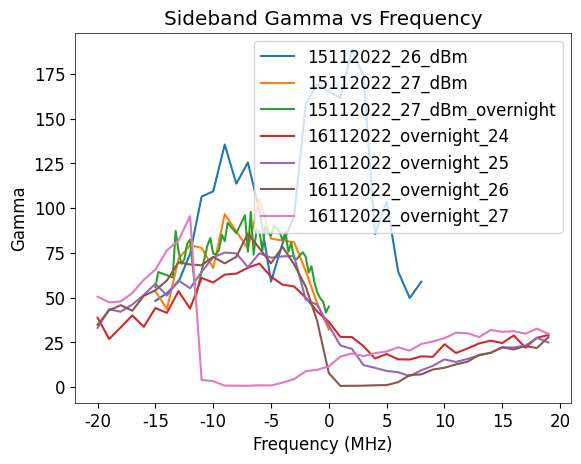

In [24]:
parent_folder = os.path.dirname(sys.path[0])
path = os.path.join(parent_folder, "Gamma Results")
plt = plot_detuning_vs_gamma(path)
plt = add_plot_labels(plt)
plt.savefig('/home/henry/Documents/Physics Internship/test3',
                bbox_inches='tight', format='png')